In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car_price_prediction_.csv')
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
df.sample()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
1748,1749,Audi,2020,5.5,Electric,Manual,271889,New,57910.1,A3


In [4]:
df.tail()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5
2499,2500,Toyota,2005,4.6,Diesel,Automatic,80978,Used,16594.14,RAV4


In [5]:
df.shape

(2500, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Car ID,2500.0,1250.500000,721.832160,1.00,625.750,1250.50,1875.2500,2500.00
Year,2500.0,2011.626800,6.991700,2000.00,2005.000,2012.00,2018.0000,2023.00
Engine Size,2500.0,3.465240,1.432053,1.00,2.200,3.40,4.7000,6.00
Mileage,2500.0,149749.844800,87919.952034,15.00,71831.500,149085.00,225990.5000,299967.00
Price,2500.0,52638.022532,27295.833455,5011.27,28908.485,53485.24,75838.5325,99982.59


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [8]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Brand'].unique()

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

In [11]:
df['Brand'].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

In [12]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64

In [13]:
df['Transmission'].value_counts()

Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

In [14]:
df['Condition'].value_counts()

Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

In [15]:
df['Model'].unique()

array(['Model X', '5 Series', 'A4', 'Model Y', 'Mustang', 'Q7', 'Q5',
       'Civic', 'Explorer', 'Model 3', 'Fiesta', 'X3', 'GLA', 'A3', 'X5',
       'C-Class', 'E-Class', 'CR-V', 'Camry', 'Accord', 'GLC', 'Corolla',
       'Fit', 'Model S', 'Prius', '3 Series', 'RAV4', 'Focus'],
      dtype=object)

In [16]:
df['Model'].value_counts()

Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang      77
Name: count, dtype: int64

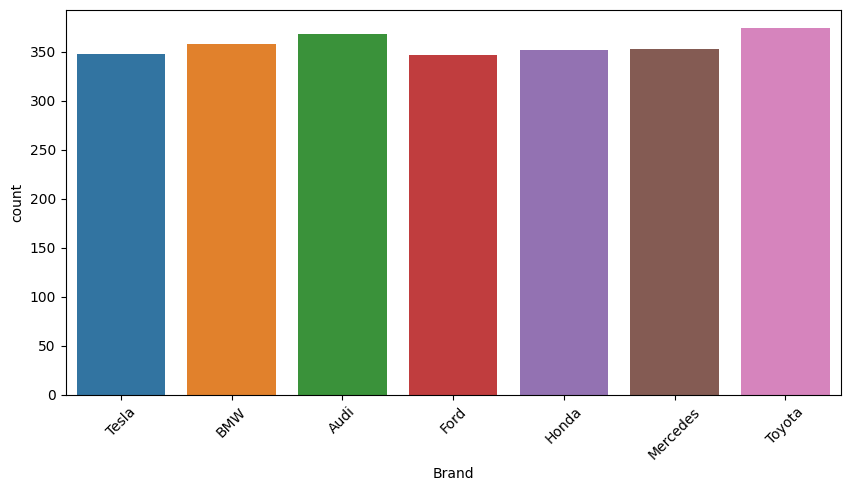

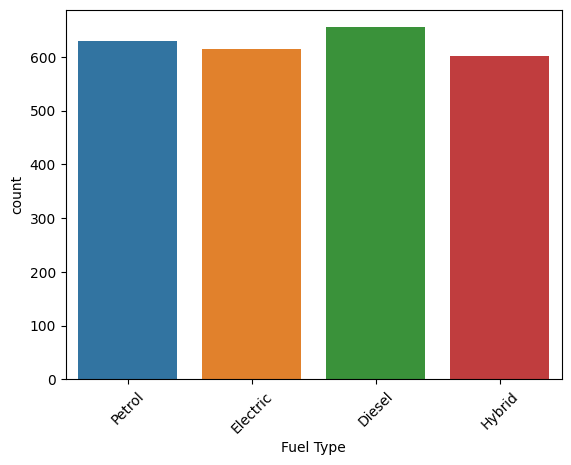

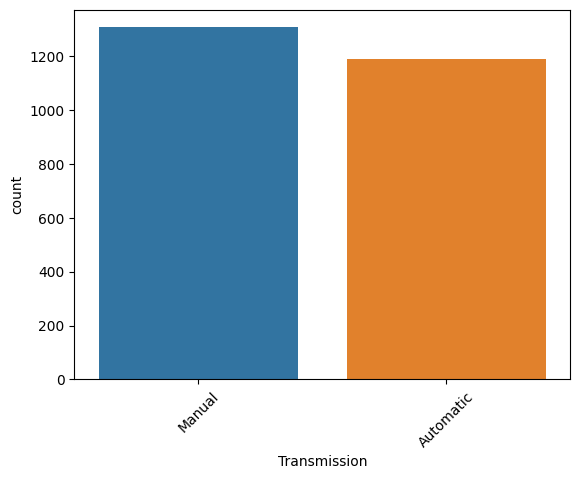

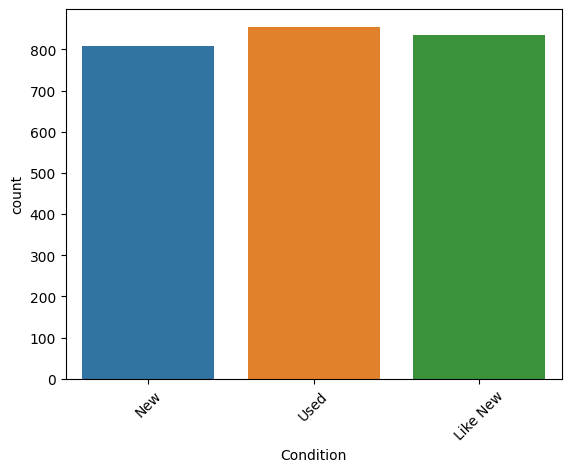

In [17]:
plt.figure(figsize=(10,5))
for col in ['Brand', 'Fuel Type', 'Transmission', 'Condition']:
    sns.countplot(df, x=col, hue=col)
    plt.xticks(rotation=45)
    plt.show()

In [18]:
df.groupby('Year')['Brand'].value_counts()

Year  Brand   
2000  Audi        20
      Mercedes    15
      Toyota      14
      Honda       13
      BMW         12
                  ..
2023  Honda       14
      Mercedes    14
      Tesla       14
      BMW         13
      Ford         9
Name: count, Length: 168, dtype: int64

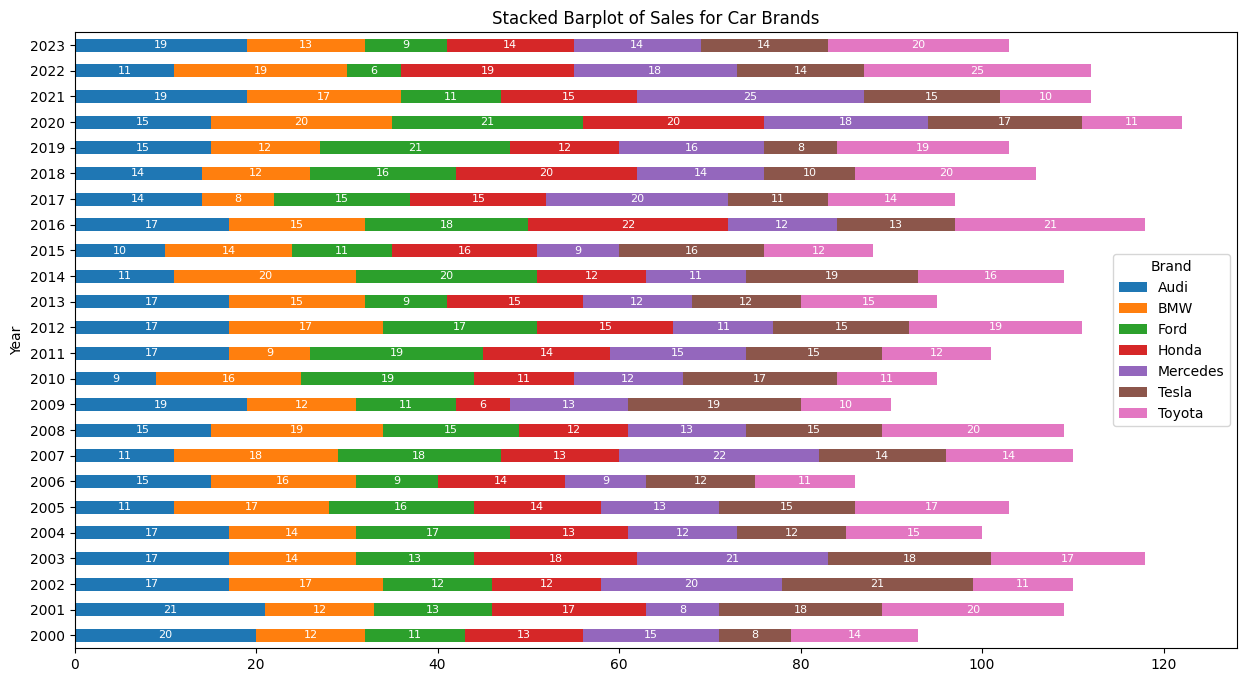

In [19]:
grouped=df.groupby(['Year', 'Brand']).size().unstack(fill_value=0)
ax=grouped.plot(kind='barh', stacked=True, figsize=(15,8))
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='white')
    plt.title('Stacked Barplot of Sales for Car Brands')
plt.show()

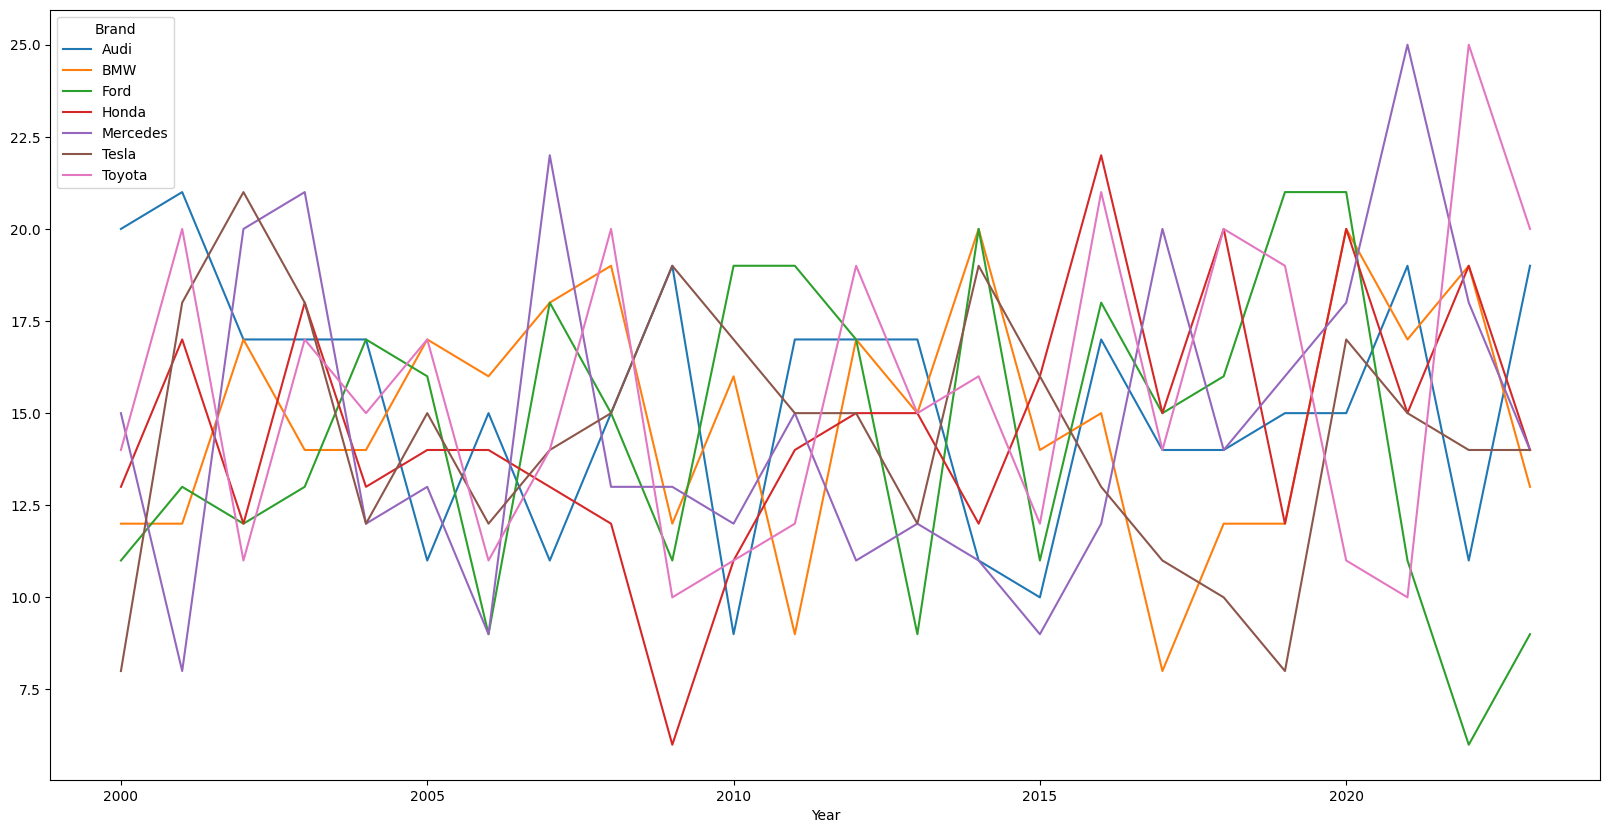

In [20]:
grouped=df.groupby(['Year', 'Brand']).size().unstack(fill_value=0)
ax=grouped.plot(kind='line', figsize=(20,10))
plt.show()

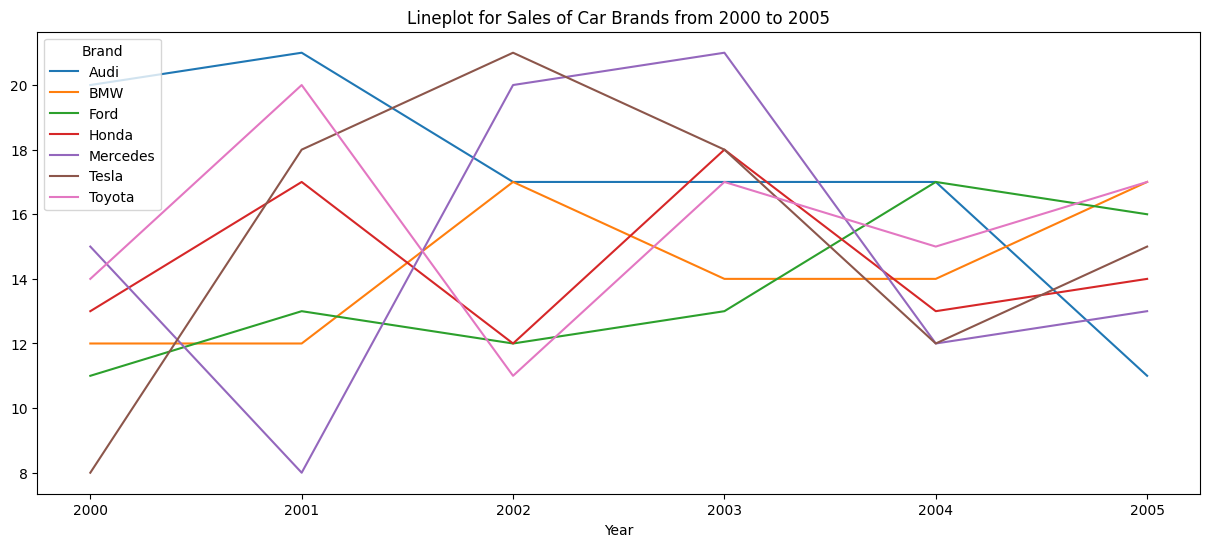

In [21]:
df_2000_2005=df[(df['Year']>=2000) & (df['Year']<=2005)]
grouped_df=df_2000_2005.groupby(['Year', 'Brand']).size().unstack(fill_value=0)
ax=grouped_df.plot(kind='line', figsize=(15,6))
plt.title('Lineplot for Sales of Car Brands from 2000 to 2005')
plt.show()

In [22]:
df.groupby('Condition')['Price'].sum().sort_values(ascending=False)

Condition
Used        44862635.81
Like New    44741671.97
New         41990748.55
Name: Price, dtype: float64

In [23]:
df.groupby('Brand')['Price'].sum()

Brand
Audi        19118860.33
BMW         19388246.95
Ford        17902859.42
Honda       18321699.95
Mercedes    18776454.80
Tesla       18609490.52
Toyota      19477444.36
Name: Price, dtype: float64

In [24]:
df.groupby('Model')['Price'].sum().sort_values(ascending=False).head(6)

Model
Corolla     5539608.37
3 Series    5446184.49
Fiesta      5285255.56
5 Series    5206737.32
Camry       5076496.45
Q7          4996482.65
Name: Price, dtype: float64

In [25]:
df.groupby('Brand')['Model'].unique()

Brand
Audi                            [A4, Q7, Q5, A3]
BMW                 [5 Series, X3, X5, 3 Series]
Ford          [Mustang, Explorer, Fiesta, Focus]
Honda                 [Civic, CR-V, Accord, Fit]
Mercedes            [GLA, C-Class, E-Class, GLC]
Tesla       [Model X, Model Y, Model 3, Model S]
Toyota             [Camry, Corolla, Prius, RAV4]
Name: Model, dtype: object

In [26]:
df.groupby('Brand')['Model'].value_counts()

Brand     Model   
Audi      A3           98
          A4           96
          Q7           95
          Q5           79
BMW       3 Series     93
          5 Series     93
          X3           92
          X5           80
Ford      Fiesta      103
          Explorer     86
          Focus        81
          Mustang      77
Honda     CR-V         95
          Fit          89
          Accord       88
          Civic        80
Mercedes  C-Class      92
          GLA          92
          E-Class      89
          GLC          80
Tesla     Model X      93
          Model Y      89
          Model 3      87
          Model S      79
Toyota    Corolla     103
          Prius        93
          Camry        90
          RAV4         88
Name: count, dtype: int64

In [27]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

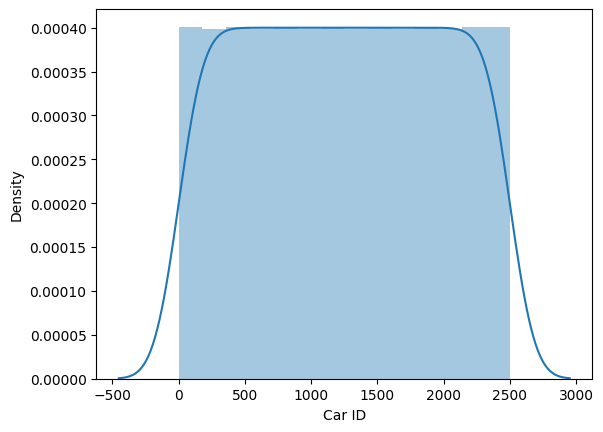

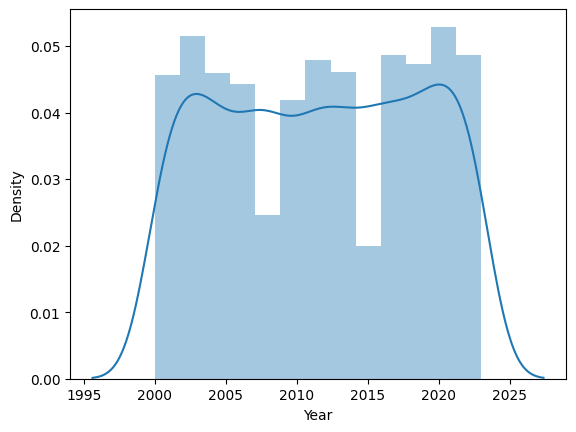

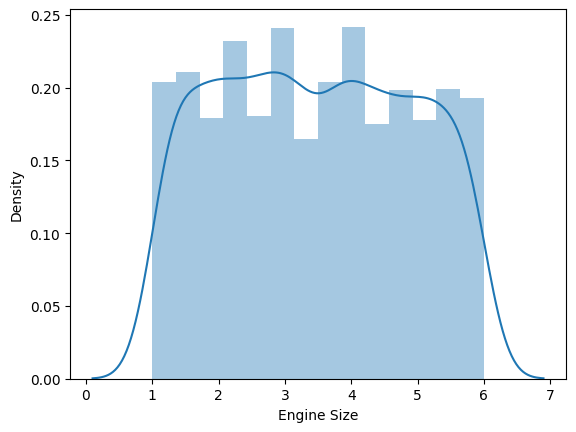

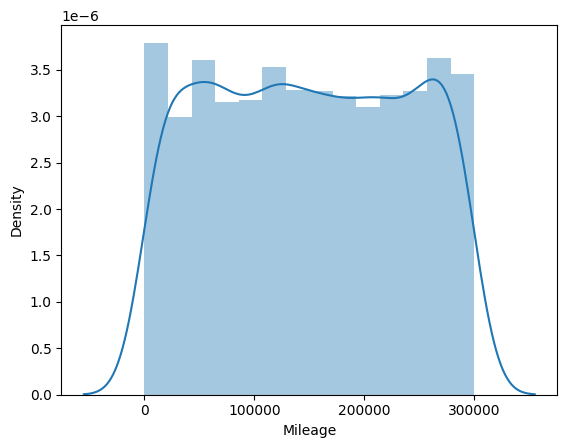

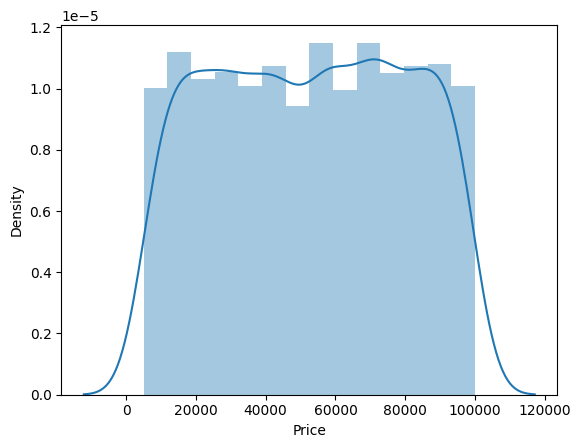

In [28]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

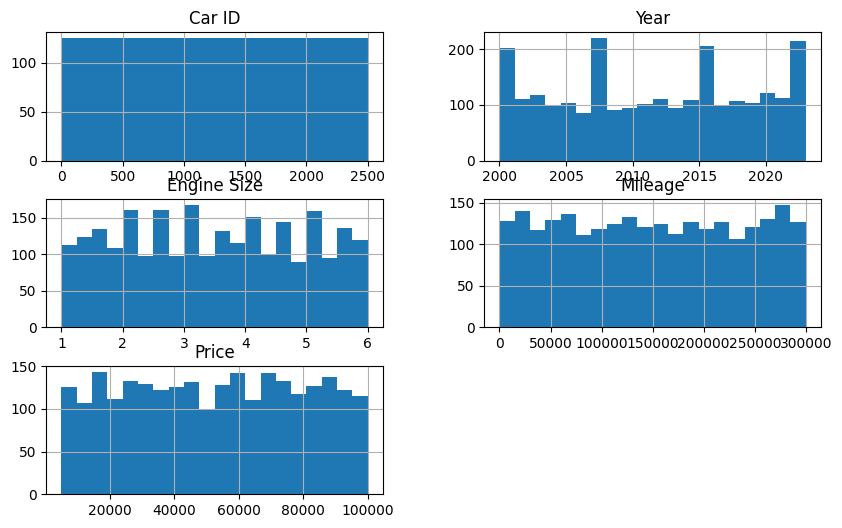

In [29]:
df.hist(bins=20, figsize=(10,6))
plt.show()

In [30]:
columns_to_encode=['Brand', 'Fuel Type', 'Transmission', 'Model']
df=pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
#'drop_first=True' prevents multicollinearity by dropping the first category's column
#This means if Diesel and Hybrid are 0, then fuel type must be the one that was dropped

In [31]:
from sklearn.preprocessing import OrdinalEncoder
condition_order=['Used', 'Like New', 'New']#lowest to highest
oe=OrdinalEncoder(categories=[condition_order])
df['Condition_Ordinal']=oe.fit_transform(df[['Condition']])

In [32]:
df.head()

,Car ID,Year,Engine Size,Mileage,Condition,Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,...,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5,Condition_Ordinal
0,1,2016,2.3,114832,New,26613.92,False,False,False,False,...,True,False,False,False,False,False,False,False,False,2.0
1,2,2018,4.4,143190,Used,14679.61,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
2,3,2013,4.5,181601,New,44402.61,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2.0
3,4,2011,4.1,68682,New,86374.33,False,False,False,False,...,False,True,False,False,False,False,False,False,False,2.0
4,5,2009,2.6,223009,Like New,73577.10,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1.0


In [33]:
df.columns

Index(['Car ID', 'Year', 'Engine Size', 'Mileage', 'Condition', 'Price',
       'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Mercedes',
       'Brand_Tesla', 'Brand_Toyota', 'Fuel Type_Electric', 'Fuel Type_Hybrid',
       'Fuel Type_Petrol', 'Transmission_Manual', 'Model_5 Series', 'Model_A3',
       'Model_A4', 'Model_Accord', 'Model_C-Class', 'Model_CR-V',
       'Model_Camry', 'Model_Civic', 'Model_Corolla', 'Model_E-Class',
       'Model_Explorer', 'Model_Fiesta', 'Model_Fit', 'Model_Focus',
       'Model_GLA', 'Model_GLC', 'Model_Model 3', 'Model_Model S',
       'Model_Model X', 'Model_Model Y', 'Model_Mustang', 'Model_Prius',
       'Model_Q5', 'Model_Q7', 'Model_RAV4', 'Model_X3', 'Model_X5',
       'Condition_Ordinal'],
      dtype='object')

In [34]:
x=df.drop(columns={'Condition','Car ID','Price'})
y=df['Price']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [36]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x=sca.fit_transform(x)

In [37]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=1)
rg.fit(x_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [39]:
yhat_train_rg=rg.predict(x_train)
yhat_test_rg=rg.predict(x_test)

In [40]:
mse_train=mean_squared_error(y_train, yhat_train_rg)
rmse_train=np.sqrt(mse_train)
r2_train=r2_score(y_train,yhat_train_rg)

print('Training Data Metrics:')
print(f'R-squared: {r2_train:.4f}')
print(f'RMSE: {rmse_train:.2f}')

Training Data Metrics:
R-squared: 0.0211
RMSE: 27363.85


In [41]:
mse_test=mean_squared_error(y_test, yhat_test_rg)
rmse_test=np.sqrt(mse_test)
r2_test=r2_score(y_test,yhat_test_rg)

print('Training Data Metrics:')
print(f'R-squared: {r2_test:.4f}')
print(f'RMSE: {rmse_test:.2f}')

Training Data Metrics:
R-squared: -0.0184
RMSE: 26644.15


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
yhat_train_lr=lr.predict(x_train)
yhat_test_lr=lr.predict(x_test)

In [44]:
mse_train=mean_squared_error(y_train, yhat_train_lr)
rmse_train=np.sqrt(mse_train)
r2_train=r2_score(y_train,yhat_train_lr)

print('Training Data Metrics:')
print(f'R-squared: {r2_train:.4f}')
print(f'RMSE: {rmse_train:.2f}')

Training Data Metrics:
R-squared: 0.0211
RMSE: 27363.69


In [45]:
mse_test=mean_squared_error(y_test, yhat_test_lr)
rmse_test=np.sqrt(mse_test)
r2_test=r2_score(y_test,yhat_test_lr)

print('Training Data Metrics:')
print(f'R-squared: {r2_test:.4f}')
print(f'RMSE: {rmse_test:.2f}')

Training Data Metrics:
R-squared: -0.0189
RMSE: 26651.07
